In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./data/Aviation_Data.csv', parse_dates=['Event.Date', 'Publication.Date'], low_memory=False)

#Sam's addition, parsing dates

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

In [4]:
df.head()
# something looks off with event date because the years are not in range of data set

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [6]:
df.describe(include='all')

<ipython-input-6-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-6-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,90348,88889,88889,88837,88663,34382,34373,50249,52790,87889,85695,32287,87572,88826,88797,88787,82805.000000,81812,32023,12582,82697,16648,77488.000000,76379.000000,76956.000000,82977.000000,84397,61724,82508,73659
unique,87951,71,88863,14782,27758,219,25589,27154,10375,24871,109,4,15,79105,8237,12318,2,NaN,13,31,3,26,13590,NaN,NaN,NaN,NaN,4,12,17007,2923
top,20001214X45071,Accident,DCA22WA214,1982-05-16 00:00:00,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,NaN,Reciprocating,091,NSCH,Personal,Pilot,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,2020-09-25 00:00:00
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,NaN,69530,18221,4474,49448,258,NaN,NaN,NaN,NaN,77303,15428,61754,16317
first,NaN,NaN,NaN,1948-10-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980-04-16 00:00:00
last,NaN,NaN,NaN,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-30 00:00:00
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.146585,NaN,NaN,NaN,NaN,NaN,0.647855,0.279881,0.357061,5.325440,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446510,NaN,NaN,NaN,NaN,NaN,5.485960,1.544084,2.235625,27.913634,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN


In [7]:
df['Investigation.Type'].value_counts()

Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
20-08-2021       37
20-09-2021       33
05-05-2021       29
03-12-2020       29
06-05-2021       24
24-08-2021       22
14-06-2022       21
19-11-2020       20
28-01-2021       18
27-05-2021       18
13-10-2022       17
19-10-2021       17
24-06-2021       15
16-11-2021       15
01-11-2022       14
01-07-2022       14
06-10-2022       14
17-12-2021       13
26-08-2021       13
08-09-2022       13
13-07-2022       13
22-09-2022       13
05-07-2022       13
20-10-2021       12
25-05-2021       11
01-09-2022       10
15-07-2021       10
16-07-2021       10
10-06-2021       10
12-08-2022       10
15-10-2021        9
22-06-2022        8
22-09-2021        8
23-09-2022        8
29-01-2021        8
02-12-2022        8
20-05-2021        8
29-09-2021        8
14-12-2021        8
20-07-2022        8
31-08-2021        7
01-06-2021        7
08-06-2021        6
13-12-2021        6
26-01-2021        5


In [8]:
df['Purpose.of.flight'].value_counts()
# filter values for private vs commercial

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [9]:
df['Air.carrier'].value_counts()

Pilot                             258
American Airlines                  90
United Airlines                    89
Delta Air Lines                    53
SOUTHWEST AIRLINES CO              42
                                 ... 
Key Lime Air, Inc. (dba: Same)      1
(dba: Aeroexo)                      1
CARDINAL 19PC LLC.                  1
Aeropaca S.A.S.                     1
Martinaire Aviation                 1
Name: Air.carrier, Length: 13590, dtype: int64

In [10]:
df['Location'].value_counts()
#filter data for country and state using .str.split()

ANCHORAGE, AK                        434
MIAMI, FL                            200
ALBUQUERQUE, NM                      196
HOUSTON, TX                          193
CHICAGO, IL                          184
                                    ... 
New Chitose Airport (RJCC), Japan      1
Santa Izabel do Rio Negro, Brazil      1
Clever, MO                             1
Kenney Lake, AK                        1
RICHVIEW, IL                           1
Name: Location, Length: 27758, dtype: int64

In [11]:
df['Total.Uninjured'].value_counts()

0.0      29879
1.0      25101
2.0      15988
3.0       4313
4.0       2662
5.0        887
6.0        500
7.0        281
8.0        163
9.0        128
10.0       108
11.0        63
12.0        52
13.0        45
16.0        40
15.0        37
14.0        36
17.0        33
18.0        31
53.0        31
19.0        28
20.0        26
51.0        23
21.0        22
131.0       21
37.0        21
44.0        21
147.0       20
133.0       20
140.0       20
99.0        19
52.0        19
102.0       18
132.0       18
32.0        18
50.0        18
45.0        18
185.0       17
144.0       17
25.0        17
26.0        17
111.0       17
40.0        17
84.0        17
39.0        17
33.0        17
36.0        17
28.0        16
142.0       16
145.0       16
112.0       16
71.0        16
106.0       16
73.0        16
59.0        16
141.0       16
41.0        16
121.0       16
22.0        16
146.0       16
95.0        15
173.0       15
31.0        15
136.0       15
150.0       15
110.0       15
108.0     

# Sam's Addition

In [12]:
df.head(20)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,SCHD,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,2017-09-19
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,2001-06-11
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982-01-01
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,NaN,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,1982-01-01


We want to string split so that we can lump by states and countries

In [13]:
df['Location_City'] = df['Location'].str.split(", ").str[0].str.upper()

In [14]:
df['Location_State_Country'] = df['Location'].str.split(", ").str[1].str.upper()

In [15]:
df['Location_State_Country'].value_counts().head()

CA    8857
TX    5913
FL    5825
AK    5672
AZ    2834
Name: Location_State_Country, dtype: int64

In [16]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT,MOOSE CREEK,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19,BRIDGEPORT,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26,SALTVILLE,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-12-09,EUREKA,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16,CANTON,OH


In [17]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,2022-12-29,ANNAPOLIS,MD
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT,HAMPTON,NH
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,2022-12-27,PAYSON,AZ
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaT,MORGAN,UT
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,2022-12-30,ATHENS,GA


After investigating the 'Investigation.Type' column, we have identified there should be only 2 categories ("Accident vs. Incident"), summing to a total of 88,889 rows vs. the total 90,348. We have looked at '25-09-2020', '26-09-2020', and '02-02-2021', all of which show rows consisting of null values. We need to filter out the dataset to show only the 2 categories.

In [18]:
df[df['Investigation.Type'] ==  '02-02-2021'].head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
75894,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
78228,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
78351,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
78499,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
78513,NaN,02-02-2021,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [19]:
df = df[(df['Investigation.Type'] == 'Accident') | (df['Investigation.Type'] == 'Incident')]

In [20]:
#checking to see if df was filtered down to just Accidents and Incidents

df['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

Next we want to investigate the date range earlier than 1962 because it seems like there are dates before this year.

In [21]:
df[(df['Event.Date'] < '1962-01-01')]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaT,MOOSE CREEK,ID


There seems to be only one date before 1962. We should be able to throw out. However, the Aviation Accident Database provides this acknowledgement.

"Generally, a preliminary report is available online within a few days of an accident. Factual information is added when available, and when the investigation is completed, the preliminary report is replaced with a final description of the accident and its probable cause. Full narrative descriptions may not be available for dates before 1993, cases under revision, or where NTSB did not have primary investigative responsibility."

In [22]:
#We narrow the scope of our data to 1993 and after to start with data with full narrative descriptions

df = df[(df['Event.Date'] >= '1993-01-01')]

In [23]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
32026,20001211X11729,Accident,MIA93FA041,1993-01-01,"LILLIAN, AL",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N72088,Luscombe,8A,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,1.0,0.0,1.0,0.0,VMC,Approach,Probable Cause,1993-11-15,LILLIAN,AL
32027,20001211X11711,Accident,LAX93LA087,1993-01-01,"FOLSOM, CA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Destroyed,NaN,N7462F,Hughes,269C,No,1.0,Reciprocating,NaN,NaN,Other Work Use,NaN,0.0,1.0,0.0,0.0,VMC,Maneuvering,Probable Cause,1993-10-13,FOLSOM,CA
32028,20001211X11645,Accident,ATL93LA045,1993-01-01,"FUQUAY-VARINA, NC",United States,NaN,NaN,5W5,TRIPLE W AIRPARK,Non-Fatal,Destroyed,NaN,N714XN,Cessna,152,No,1.0,Reciprocating,NaN,NaN,Instructional,NaN,0.0,0.0,1.0,0.0,VMC,Approach,Probable Cause,1993-10-25,FUQUAY-VARINA,NC
32029,20001211X11732,Accident,MIA93LA042,1993-01-01,"TITUSVILLE, FL",United States,NaN,NaN,TIX,SPACE CENTER EXECUTIVE,Non-Fatal,Substantial,NaN,N82542,Piper,PA-32R-301,No,1.0,Reciprocating,NaN,NaN,Instructional,NaN,0.0,0.0,1.0,1.0,VMC,Approach,Probable Cause,1994-10-02,TITUSVILLE,FL
32030,20001211X11647,Accident,ATL93LA048,1993-01-01,"BESSEMER, AL",United States,NaN,NaN,2A3,BESSEMER,Non-Fatal,Substantial,NaN,N4292N,Cessna,120,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1993-03-11,BESSEMER,AL


In [24]:
#We take a look at where the null values are

df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     41
Country                      73
Latitude                  22490
Longitude                 22499
Airport.Code              23443
Airport.Name              22694
Injury.Severity            1000
Aircraft.damage            2498
Aircraft.Category         28248
Registration.Number        1295
Make                         56
Model                        72
Amateur.Built               101
Number.of.Engines          5749
Engine.Type                7073
FAR.Description           28512
Schedule                  49496
Purpose.of.flight          6145
Air.carrier               41966
Total.Fatal.Injuries      11245
Total.Serious.Injuries    12309
Total.Minor.Injuries      11726
Total.Uninjured            5774
Weather.Condition          4489
Broad.phase.of.flight     26851
Report.Status              6381
Publication.Date           2784
Location

In [25]:
# We still have more cleaning up to do. Let's look at the country column
df['Country'].value_counts()

United States                       50738
Brazil                                373
Canada                                350
United Kingdom                        342
Mexico                                334
Australia                             298
France                                233
Spain                                 226
Germany                               211
Colombia                              190
Bahamas                               148
South Africa                          129
Japan                                 121
Venezuela                             119
Italy                                 114
Indonesia                             110
Argentina                             110
India                                  96
Peru                                   93
Russia                                 91
Ireland                                77
China                                  67
Guatemala                              66
Eswatini                          

In [26]:
#Let's look at Weather Conditions
df['Weather.Condition'].value_counts()

VMC    48399
IMC     3335
UNK      378
Unk      262
Name: Weather.Condition, dtype: int64

There are 4 weather conditions (https://support.crewlounge.aero/support/solutions/articles/24000034167-difference-between-vfr-ifr-vmc-imc-and-actual-simulated-simulator-time)

VMC - Visual Meteorologic Condition: Visibility and clouds are clear and allow you to fly the aircraft by visual reference
IMC - Instrument Meteorologic Condition: The weather is restricting your visibility, you need aircraft flight instruments to fly safe

UNK and Unk means unknown. We should consolidate this into 1 grouping

In [27]:
df[df['Weather.Condition'] == "Unk"] = "UNK"

In [28]:
#Check the Weather Condition Categories
df['Weather.Condition'].value_counts()

VMC    48399
IMC     3335
UNK      640
Name: Weather.Condition, dtype: int64

Let's check for duplicate Accident Numbers

In [29]:
#Total Number of Accident Unfiltered is 56863
len(df['Accident.Number'])

56863

In [30]:
#Check for Duplicates
df['Accident.Number'].value_counts().head()

UNK           262
WPR23LA041      2
ERA22LA379      2
ERA22LA364      2
DCA22WA172      2
Name: Accident.Number, dtype: int64

In [31]:
df[df['Accident.Number'] == 'UNK']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
67173,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
67763,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
68347,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
69021,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
69509,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
69697,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
70003,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
71098,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
71402,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK
71461,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK,UNK


In [32]:
df[df['Accident.Number'] == 'ERA22FA318']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
89593,20220718105496,Accident,ERA22FA318,2022-07-17 00:00:00,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,Fatal,Destroyed,Airplane,N97CX,PIPER,PA 46-350P,No,1,NaN,091,NaN,Personal,NaN,4,0,0,0,VMC,NaN,NaN,2022-05-08 00:00:00,LAS VEGAS,NV
89594,20220718105496,Accident,ERA22FA318,2022-07-17 00:00:00,"Las Vegas, NV",United States,361239N,1151140W,VGT,NORTH LAS VEGAS,Fatal,Destroyed,Airplane,N160RA,CESSNA,172N,No,1,NaN,091,NaN,Instructional,Airwork Las Vegas,4,0,0,0,VMC,NaN,NaN,2022-05-08 00:00:00,LAS VEGAS,NV


In [33]:
df[df['Accident.Number'] == 'DCA22WA167']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
88619,20220801105632,Incident,DCA22WA167,2022-01-22 00:00:00,"Kigali,",Rwanda,001587S,0030822E,NaN,NaN,NaN,NaN,Airplane,9XR-WH,BOMBARDIER,CL600 2D24,No,NaN,NaN,NUSC,NaN,NaN,RwandAir,0,0,0,0,NaN,NaN,NaN,NaT,KIGALI,
88620,20220801105632,Incident,DCA22WA167,2022-01-22 00:00:00,"Kigali,",Rwanda,001587S,0030822E,NaN,NaN,NaN,NaN,Airplane,ET-AQN,BOEING,737-800,No,NaN,NaN,NUSC,SCHD,NaN,Ethopian Air,0,0,0,0,NaN,NaN,NaN,NaT,KIGALI,


Based on the investigation, we can remove the 'UNK' category in the Accident.Number, then we will need to drop duplicates

In [34]:
#First drop the UNK category

df = df[df['Accident.Number'] != 'UNK']

In [35]:
df['Accident.Number'].value_counts()

DCA22WA130    2
WPR23LA041    2
DCA22WA214    2
WPR22FA309    2
ERA22LA379    2
             ..
NYC03LA146    1
CHI03LA050    1
CEN12LA623    1
CHI94LA173    1
LAX05LA039    1
Name: Accident.Number, Length: 56575, dtype: int64

In [36]:
#Next drop duplicates
df = df.drop_duplicates(subset=['Accident.Number'])

In [37]:
df['Accident.Number'].value_counts()

MIA04CA059    1
CHI03LA193    1
MIA03TA175    1
WPR12LA367    1
DEN00LA159    1
             ..
WPR18WA165    1
LAX95LA093    1
ANC12CA109    1
ANC03CA077    1
LAX05LA039    1
Name: Accident.Number, Length: 56575, dtype: int64

We will now look at other categories

In [38]:
df['Aircraft.Category'].value_counts()

#From looking at the categories - We can narrow the focus to just Airplane

Airplane             24097
Helicopter            3105
Glider                 453
Balloon                200
Weight-Shift           161
Gyrocraft              158
Powered Parachute       91
Ultralight              29
Unknown                 13
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

In [39]:
df['Make'].value_counts()

Cessna                     10732
Piper                       5787
CESSNA                      4867
PIPER                       2817
Beech                       2209
                           ...  
FIEBICH PAUL DEAN              1
Garlick Helicopters Inc        1
COLE PAUL B                    1
EMMET SMITH                    1
Allenberg                      1
Name: Make, Length: 6875, dtype: int64

In [40]:
df['Model'].value_counts()

172          1118
152          1030
172N          685
PA-28-140     490
737           473
             ... 
CE-500          1
Buzzard         1
AMT-100         1
11-AC           1
747-8F          1
Name: Model, Length: 9701, dtype: int64

In [41]:
df['Amateur.Built'].value_counts()

#Given that we are addressing commercial and private enterprises, we want to remove Amateur Built Aircrafts

No     50266
Yes     6208
Name: Amateur.Built, dtype: int64

We narrow down the df to just Airplanes and Not Amateur Built

In [42]:
df = df[(df['Aircraft.Category'] == 'Airplane') & (df['Amateur.Built'] == 'No')]

In [43]:
#Checking Aircraft Category
df['Aircraft.Category'].value_counts()

Airplane    21115
Name: Aircraft.Category, dtype: int64

In [44]:
df['Amateur.Built'].value_counts()

No    21115
Name: Amateur.Built, dtype: int64

We will now look at other categories

In [45]:
df['FAR.Description'].value_counts()

#FAR means Federal Aviation Regulations (https://www.ecfr.gov/current/title-14/chapter-I/subchapter-G)


091                              13340
Part 91: General Aviation         2459
NUSN                              1069
NUSC                               779
137                                741
121                                602
135                                535
UNK                                221
129                                194
Part 137: Agricultural             150
PUBU                               124
Part 121: Air Carrier              106
Non-U.S., Non-Commercial            71
Part 129: Foreign                   71
Part 135: Air Taxi & Commuter       71
Non-U.S., Commercial                67
091K                                14
Unknown                             12
Public Use                          12
125                                  5
ARMF                                 4
Part 125: 20+ Pax,6000+ lbs          2
107                                  1
Part 91 Subpart K: Fractional        1
Name: FAR.Description, dtype: int64

List of FAA Acronym List (https://www.proairpilot.com/faa-acronyms-list.html)

FAR means Federal Aviation Regulations (https://www.ecfr.gov/current/title-14/chapter-I/subchapter-G)
- Part 91: General Operating and Flight Rules
- Part 91/Subpart K: Fractional Ownership Operations
- Part 107: Small Unmanned Aircraft Systems
- Part 121: Operating Requirements: Domestic, Flag, and Supplemental Operations (Air Carrier)
- Part 125: Certification and Operations: Aircraft Having a Seating Capacity of 20 or More Passengers or a Maximum Payload Capacity of 6,000 Pounds or More; and Rules Governing Persons on Board Such Aircraft (20+ Pax, 6000+)
- Part 129: Operations: Foreign Air Carriers and Foreign Operators of U.S. - Registered Aircraft Engaged in Common Carriage
- Part 135: Operating Requirements: Commuter and on Demand Operations and Rules Governing Persons on Board Such Aircraft (Air Taxi & Commuter)
- Part 137: Agricultural Aircraft Operations
- Non-U.S., Non-Commercial
- Non-U.S., Commercial
- ARMF
- NUSN
- NUSC
- PUBU
- Public Use
- UNK

This one might be harder to categorize into smaller groups (Hard to understand what some of these acronyms mean)

In [46]:
df['Schedule'].value_counts()

SCHD    1311
NSCH    1063
UNK       30
Name: Schedule, dtype: int64

In [47]:
df['Purpose.of.flight'].value_counts()

Personal                     11620
Instructional                 2736
Aerial Application             929
Business                       489
Positioning                    343
Unknown                        332
Aerial Observation             159
Other Work Use                 152
Skydiving                      150
Flight Test                    120
Ferry                          102
Executive/corporate            102
Banner Tow                      89
Public Aircraft - Federal       51
Air Race show                   48
Public Aircraft                 37
Glider Tow                      35
Public Aircraft - State         24
Firefighting                    16
Public Aircraft - Local         12
Air Race/show                    4
ASHO                             4
Air Drop                         3
PUBS                             3
External Load                    1
Name: Purpose.of.flight, dtype: int64

What some of the Purpose of flights mean (chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.ntsb.gov/safety/safety-studies/Documents/SS0101.pdf) or 
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.faa.gov/sites/faa.gov/files/2022GASurvey-Appendix-B-Documents_04DEC2023V1.pdf or chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://ia903102.us.archive.org/17/items/6560171-Survival-Flight-Accident-Report/6560171-Survival-Flight-Accident-Report.pdf:

Purpose of Flight seems like a good category to reclassify in new groupings. Just to clean up the data, it might be worth reclassifying the following to the 15 categories (16 with the Unknown Category) in the Table 4 for Purpose of Flight Categories

Things to change:
- Positioning to "Other"
- Skydiving is under 14 CFR Part 105 Parachuting guidelines, which should be listed under "Other Work Use" (which includes parachuting)
- Flight Test to "Other" (Proficiency Flight is Flight Test)
- Ferry to "Other"
- Banner Tow to "Other Work Use"
- "Public Use": Public Aircraft, Public Aircraft - Federal, Public Aircraft - State, Public Aircraft - Local
- Air Race show & Air Race/show to Air Race
- Glider Tow to "Other Work Use"
- Firefighting to "Other Aerial Application"
- ASHO to "Air Race"
- PUBS to "Public Use"
- Air Drop to "Other Work Use"

# 03/04/24

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21115 entries, 32592 to 90345
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                21115 non-null  object
 1   Investigation.Type      21115 non-null  object
 2   Accident.Number         21115 non-null  object
 3   Event.Date              21115 non-null  object
 4   Location                21109 non-null  object
 5   Country                 21114 non-null  object
 6   Latitude                18971 non-null  object
 7   Longitude               18965 non-null  object
 8   Airport.Code            13925 non-null  object
 9   Airport.Name            13952 non-null  object
 10  Injury.Severity         20332 non-null  object
 11  Aircraft.damage         19952 non-null  object
 12  Aircraft.Category       21115 non-null  object
 13  Registration.Number     20913 non-null  object
 14  Make                    21112 non-null  object
 15

Up to this point we have filtered for Investigation.Type, Accident.Number, Event.Date, Location(City,StateCountry), Aircraft.Category, Amateur.Built, and Weather.Condition. 

In [49]:
df.head(50)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
32592,20001211X12054,Accident,ANC93FA054,1993-04-23 00:00:00,"KASHWITNA, AK",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,Airplane,N3741Z,Piper,PA-18-150,No,1,Reciprocating,Part 91: General Aviation,NaN,Business,NaN,2,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,2012-08-17 00:00:00,KASHWITNA,AK
33535,20001211X13214,Accident,NYC93FA154,1993-08-14 00:00:00,"EAST MORICHES, NY",United States,NaN,NaN,1N2,SPADARO,Fatal(1),Destroyed,Airplane,N5010D,Cessna,182A,No,1,Reciprocating,Part 91: General Aviation,NaN,Skydiving,NaN,1,4,NaN,NaN,VMC,Takeoff,Probable Cause,2016-10-17 00:00:00,EAST MORICHES,NY
33580,20001211X13180,Accident,LAX93LA329,1993-08-18 00:00:00,PACIFIC OCEAN,PACIFIC OCEAN,NaN,NaN,NaN,NaN,Non-Fatal,Destroyed,Airplane,N1232H,Piper,PA-34-220,No,1,Reciprocating,Part 91: General Aviation,NaN,Ferry,NaN,NaN,NaN,NaN,1,VMC,Cruise,Probable Cause,2016-03-23 00:00:00,PACIFIC OCEAN,NaN
33711,20001211X13402,Accident,FTW93LA257,1993-09-04 00:00:00,"FENTRESS, TX",United States,NaN,NaN,NaN,NaN,Fatal(1),Minor,Airplane,N125MB,Beech,C-45H,No,2,Reciprocating,Part 91: General Aviation,NaN,Skydiving,NaN,1,NaN,NaN,10,VMC,Cruise,Probable Cause,2016-10-17 00:00:00,FENTRESS,TX
33880,20001211X13354,Accident,BFO93LA184,1993-09-25 00:00:00,"EMPORIA, VA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N9841L,Cessna,172,No,1,Reciprocating,Part 91: General Aviation,NaN,Aerial Observation,NaN,NaN,NaN,NaN,2,VMC,Takeoff,Probable Cause,2010-12-28 00:00:00,EMPORIA,VA
34143,20001211X13771,Accident,LAX94WA053,1993-11-13 00:00:00,"MULEGE, MEXICO",Mexico,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N6879J,Piper,PA-32R-300,No,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,1,3,1,VMC,NaN,Foreign,1994-05-05 00:00:00,MULEGE,MEXICO
34210,20001211X13695,Accident,BFO94FA021,1993-11-28 00:00:00,"BUTLER, PA",United States,NaN,NaN,BTP,BUTLER COUNTY,Fatal(1),Destroyed,Airplane,N707JS,Piper,PA32R-301,No,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1,NaN,NaN,NaN,IMC,Approach,Probable Cause,2016-01-02 00:00:00,BUTLER,PA
34275,20001211X13814,Accident,ANC94LA026,1993-12-12 00:00:00,"PORT LIONS, AK",United States,NaN,NaN,ORI,PORT LIONS,Non-Fatal,Substantial,Airplane,N43527,Piper,PA-32,No,1,Reciprocating,Part 135: Air Taxi & Commuter,NSCH,Unknown,Peninsula Airways (dba: Penair),0,0,0,5,VMC,Landing,Probable Cause,2009-03-19 00:00:00,PORT LIONS,AK
34342,20001206X00618,Accident,FTW94FA060B,1994-01-02 00:00:00,"PEARLAND, TX",United States,NaN,NaN,T02,CLOVER FIELD,Fatal(5),Destroyed,Airplane,N739TL,Cessna,172N,No,1,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,5,NaN,NaN,NaN,VMC,Approach,Probable Cause,2016-12-04 00:00:00,PEARLAND,TX
34557,20001206X00742,Accident,DCA94WA036,1994-02-22 00:00:00,"ROSKILDE, DENMARK",Denmark,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,N8149S,Beech,2000 (STARSHIP),No,NaN,Unknown,"Non-U.S., Non-Commercial",UNK,Business,NaN,NaN,NaN,NaN,6,UNK,NaN,Foreign,NaT,ROSKILDE,DENMARK


In [50]:
df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                                                     2739
Foreign                                                                                                                                                                                                                                                                             283
<br /><br />                                                                                                                                                                                                                                                                        125
The pilot's failure to maintain directional control during the landing roll.                                                                                    

In [51]:
df['Injury.Severity'].value_counts()

Non-Fatal      16179
Fatal           3499
Minor            145
Serious          107
Incident         104
Fatal(1)          96
Fatal(2)          74
Fatal(3)          26
Fatal(4)          24
Unavailable       16
Fatal(5)          15
Fatal(6)          11
Fatal(7)           6
Fatal(8)           5
Fatal(10)          4
Fatal(154)         2
Fatal(13)          2
Fatal(12)          2
Fatal(18)          1
Fatal(54)          1
Fatal(20)          1
Fatal(19)          1
Fatal(9)           1
Fatal(169)         1
Fatal(97)          1
Fatal(24)          1
Fatal(131)         1
Fatal(26)          1
Fatal(228)         1
Fatal(113)         1
Fatal(125)         1
Fatal(160)         1
Fatal(65)          1
Name: Injury.Severity, dtype: int64

In [52]:
df['Injury.Severity'] = df['Injury.Severity'].map(lambda x: 'Fatal' if isinstance(x, str) and 'Fatal(' in x else x)

In [53]:
df['Injury.Severity']

32592        Fatal
33535        Fatal
33580    Non-Fatal
33711        Fatal
33880    Non-Fatal
           ...    
90328    Non-Fatal
90332    Non-Fatal
90335    Non-Fatal
90336        Minor
90345    Non-Fatal
Name: Injury.Severity, Length: 21115, dtype: object

In [54]:
df[df['Injury.Severity'] == 'Unavailable']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
41656,20001208X07697,Accident,DCA97WA043,1997-04-27 00:00:00,"JINAN, CHINA",China,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Mcdonnell Douglas,MD-82,No,NaN,Unknown,"Non-U.S., Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,JINAN,CHINA
42287,20001208X08352,Accident,DCA97WA054,1997-07-21 00:00:00,"SOUTHERN THAILA, Thailand",Thailand,NaN,NaN,NaN,NaN,Unavailable,Destroyed,Airplane,NaN,Learjet,LR-31,No,NaN,Unknown,Part 129: Foreign,NSCH,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,SOUTHERN THAILA,THAILAND
42847,20001208X08992,Accident,DCA98WA082,1997-10-09 00:00:00,"HARBIN, CHINA",China,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Cessna,650-0220,No,NaN,Unknown,"Non-U.S., Non-Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,HARBIN,CHINA
44014,20001211X10045,Accident,DCA98WA048,1998-05-29 00:00:00,"BOMBAY, INDIA",India,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Boeing,B-737-500,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,BOMBAY,INDIA
44608,20001211X10826,Accident,DCA98WA079,1998-08-05 00:00:00,"SEOUL, KOREA, REPUBLIC OF","Korea, Republic Of",NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Boeing,747-400,No,NaN,Unknown,"Non-U.S., Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,IMC,NaN,Foreign,NaT,SEOUL,KOREA
45357,20001211X11538,Accident,DCA99WA020,1998-12-05 00:00:00,"MANILLA, Philippines",Philippines,NaN,NaN,NaN,NaN,Unavailable,NaN,Airplane,NaN,NaN,A330,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,MANILLA,PHILIPPINES
45560,20001204X00045,Accident,DCA99WA035,1999-01-28 00:00:00,"NAPLES, ITALY",Italy,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Mcdonnell Douglas,MD-82,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,NAPLES,ITALY
45711,20001205X00299,Accident,DCA99WA050,1999-03-04 00:00:00,"BIARRITZ, FRANCE",France,NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Boeing,737-228,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,NaN,IMC,NaN,Foreign,NaT,BIARRITZ,FRANCE
45764,20001205X00297,Accident,DCA99WA048,1999-03-15 00:00:00,"POHANG, KOREA, REPUBLIC OF","Korea, Republic Of",NaN,NaN,NaN,NaN,Unavailable,Substantial,Airplane,NaN,Mcdonnell Douglas,MD-83,No,NaN,Unknown,"Non-U.S., Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,POHANG,KOREA
45978,20001205X00483,Accident,IAD99WA071,1999-04-24 00:00:00,"Georgetown, Guyana",Guyana,NaN,NaN,NaN,NaN,Unavailable,Destroyed,Airplane,NaN,Cessna,172M,No,NaN,Unknown,"Non-U.S., Non-Commercial",UNK,Unknown,NaN,NaN,NaN,NaN,NaN,UNK,NaN,Foreign,NaT,GEORGETOWN,GUYANA


In [55]:
df[df['Country'] == 'Brazil']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Location_City,Location_State_Country
40824,20001208X06865,Accident,DCA97WA004,1996-10-31 00:00:00,"SAO PAULO, Brazil",Brazil,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,NaN,Fokker,100,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,97,4,2,NaN,VMC,NaN,Foreign,NaT,SAO PAULO,BRAZIL
44286,20001211X10547,Incident,DCA98WA070,1998-07-02 00:00:00,"BRAZIL, Brazil",Brazil,NaN,NaN,NaN,NaN,Incident,NaN,Airplane,NaN,Boeing,737-400,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,5,UNK,NaN,Foreign,NaT,BRAZIL,BRAZIL
44359,20001211X10551,Accident,DCA98WA078,1998-07-10 00:00:00,"SAO PAULO, BRAZIL",Brazil,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,NaN,Molino Oy,MU2-2B-25,No,NaN,Unknown,Part 129: Foreign,NSCH,Unknown,NaN,NaN,NaN,NaN,5,UNK,NaN,Foreign,NaT,SAO PAULO,BRAZIL
45449,20001211X11543,Incident,DCA99WA027,1998-12-28 00:00:00,"CURITBA, BRAZIL",Brazil,NaN,NaN,NaN,NaN,Incident,Substantial,Airplane,NaN,Embraer,EMB-145,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,40,UNK,NaN,Foreign,NaT,CURITBA,BRAZIL
47911,20001212X20476,Accident,DCA00WA029,2000-02-27 00:00:00,"PORTO ALEGRE, BRAZIL",Brazil,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,NaN,Boeing,B737-400,No,NaN,Unknown,Part 129: Foreign,SCHD,Unknown,NaN,NaN,NaN,NaN,123,IMC,NaN,Foreign,NaT,PORTO ALEGRE,BRAZIL
61486,20061002X01435,Accident,DCA06RA076B,2006-09-29 00:00:00,"Azevedo, Brazil",Brazil,NaN,NaN,NaN,Cachimbo airbase,Fatal,Minor,Airplane,N600XL,Embraer,E135 Legacy,No,2,NaN,Part 91: General Aviation,NaN,Ferry,NaN,154,NaN,NaN,7,IMC,NaN,Foreign,2010-02-04 00:00:00,AZEVEDO,BRAZIL
61487,20061002X01435,Accident,DCA06RA076A,2006-09-29 00:00:00,"Azevedo, Brazil",Brazil,NaN,NaN,NaN,Cachimbo airbase,Fatal,Destroyed,Airplane,NaN,Boeing,737-800,No,2,NaN,"Non-U.S., Commercial",SCHD,NaN,NaN,154,NaN,NaN,7,IMC,NaN,Foreign,2010-02-04 00:00:00,AZEVEDO,BRAZIL
63861,20080327X00393,Accident,NYC08WA065,2007-12-19 00:00:00,"GURUPI, BRAZIL",Brazil,NaN,NaN,NaN,NaN,Fatal,Substantial,Airplane,NaN,Cirrus,SR22,No,NaN,NaN,"Non-U.S., Non-Commercial",NaN,Unknown,NaN,1,1,NaN,NaN,NaN,NaN,Foreign,2014-06-20 00:00:00,GURUPI,BRAZIL
64140,20080305X00263,Accident,NYC08WA117,2008-03-02 00:00:00,"Rio de Janiero, Brazil",Brazil,022590S,0043220W,NaN,NaN,Fatal,Destroyed,Airplane,PR-AIO,Cirrus Design Corporation,SR-22,No,NaN,NaN,NUSN,NaN,Unknown,CISA Traitings S.A.,4,0,0,0,VMC,NaN,NaN,2020-09-25 00:00:00,RIO DE JANIERO,BRAZIL
64272,20080521X00709,Accident,DCA08WA060,2008-03-31 00:00:00,"Lencois, Bahia, Brazil",Brazil,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,PT-VCI,Neiva,NE-821,No,NaN,NaN,NUSC,SCHD,NaN,Abaeté Táxi Aéreo,2,0,0,0,IMC,NaN,NaN,2020-09-25 00:00:00,LENCOIS,BAHIA


After evaluation of the Countries we have determined keeping international countries will be difficult given the limited data we have. As such we are sticking to just the U.S. 

In [56]:
df['Country'].value_counts()

United States                  17957
Brazil                           221
Mexico                           199
United Kingdom                   199
Canada                           161
Australia                        149
Spain                            147
France                           130
Germany                          114
Colombia                         107
South Africa                      74
India                             71
Indonesia                         65
Japan                             64
Italy                             57
Argentina                         56
Venezuela                         56
Peru                              55
Ireland                           47
Eswatini                          45
Bahamas                           43
China                             40
Pakistan                          37
Netherlands                       35
Guatemala                         33
Sweden                            32
Russia                            31
C

In [57]:
df = df[df['Country'] == 'United States']

In [58]:
df['Country'].value_counts()

United States    17957
Name: Country, dtype: int64

In [59]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Latitude                    135
Longitude                   142
Airport.Code               4743
Airport.Name               4741
Injury.Severity              68
Aircraft.damage             400
Aircraft.Category             0
Registration.Number           7
Make                          0
Model                         6
Amateur.Built                 0
Number.of.Engines           472
Engine.Type                1623
FAR.Description               2
Schedule                  16489
Purpose.of.flight          1168
Air.carrier                9403
Total.Fatal.Injuries       2527
Total.Serious.Injuries     2504
Total.Minor.Injuries       2221
Total.Uninjured             510
Weather.Condition           426
Broad.phase.of.flight     15224
Report.Status              1899
Publication.Date           1286
Location

In [60]:
df['Schedule'].value_counts()

NSCH    820
SCHD    643
UNK       5
Name: Schedule, dtype: int64

We feel comfortable at this point identifying columns to drop before we continue filtering. The ones we want to drop are Latitude, longitude, Broad phase of flight, Schedule. We feel they are not relevant or have to many missing values and we have deemed them not very informative for analysis purposes.

In [61]:
df = df.drop(columns= ['Latitude', 'Longitude', 'Broad.phase.of.flight', 'Schedule'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17957 entries, 32592 to 90345
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                17957 non-null  object
 1   Investigation.Type      17957 non-null  object
 2   Accident.Number         17957 non-null  object
 3   Event.Date              17957 non-null  object
 4   Location                17957 non-null  object
 5   Country                 17957 non-null  object
 6   Airport.Code            13214 non-null  object
 7   Airport.Name            13216 non-null  object
 8   Injury.Severity         17889 non-null  object
 9   Aircraft.damage         17557 non-null  object
 10  Aircraft.Category       17957 non-null  object
 11  Registration.Number     17950 non-null  object
 12  Make                    17957 non-null  object
 13  Model                   17951 non-null  object
 14  Amateur.Built           17957 non-null  object
 15

In [63]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Airport.Code              4743
Airport.Name              4741
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Registration.Number          7
Make                         0
Model                        6
Amateur.Built                0
Number.of.Engines          472
Engine.Type               1623
FAR.Description              2
Purpose.of.flight         1168
Air.carrier               9403
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status             1899
Publication.Date          1286
Location_City                0
Location_State_Country      43
dtype: int64

In [64]:
df['Airport.Name'].value_counts()

Private                      147
Private Airstrip              91
None                          28
PVT                           23
Private Strip                 19
                            ... 
Tri-State Steuben County       1
George Felt Airport            1
Alleghney County Airport       1
Ferry                          1
Sisters Eagle Air Airport      1
Name: Airport.Name, Length: 8227, dtype: int64

We have done our second round of observing null values and having investigated Airport.Code, Airport.Name, and Air.carrier we have determined that these values are also unnecessary for our analysis. 

In [65]:
df = df.drop(columns= ['Airport.Code', 'Airport.Name', 'Air.carrier'])

In [66]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Registration.Number          7
Make                         0
Model                        6
Amateur.Built                0
Number.of.Engines          472
Engine.Type               1623
FAR.Description              2
Purpose.of.flight         1168
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status             1899
Publication.Date          1286
Location_City                0
Location_State_Country      43
dtype: int64

In [67]:
df['Report.Status'].value_counts()

Probable Cause                                                                                                                            2733
The pilot's failure to maintain directional control during the landing roll.                                                                52
A loss of engine power for undetermined reasons.                                                                                            45
The pilot's failure to maintain directional control during landing.                                                                         39
A total loss of engine power for undetermined reasons.                                                                                      36
                                                                                                                                          ... 
The pilots misjudged flare during landing resulting in a hard landing and loss of directional control.                                      1

In [68]:
df['Report.Status'] = df['Report.Status'].fillna(value= 'Unknown')

In [69]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Registration.Number          7
Make                         0
Model                        6
Amateur.Built                0
Number.of.Engines          472
Engine.Type               1623
FAR.Description              2
Purpose.of.flight         1168
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Publication.Date          1286
Location_City                0
Location_State_Country      43
dtype: int64

In [70]:
df['Purpose.of.flight'].value_counts()

Personal                     11351
Instructional                 2680
Aerial Application             879
Business                       454
Positioning                    330
Aerial Observation             145
Skydiving                      142
Other Work Use                 139
Flight Test                    114
Executive/corporate             93
Banner Tow                      89
Ferry                           87
Unknown                         69
Public Aircraft - Federal       47
Air Race show                   39
Glider Tow                      34
Public Aircraft                 33
Public Aircraft - State         24
Firefighting                    14
Public Aircraft - Local         12
Air Race/show                    4
ASHO                             4
PUBS                             3
Air Drop                         3
Name: Purpose.of.flight, dtype: int64

We observed that Publication.Date isn't useful for our analysis.

In [71]:
def purposeoff(df, replace_value, original_value):
    df['Purpose.of.flight'] = df['Purpose.of.flight'].map(lambda x: replace_value if isinstance(x, str) and original_value in x else x)
    return df['Purpose.of.flight']

In [72]:
POF_dict = {"Positioning": "Other",
            "Skydiving": "Other Work Use", 
            "Flight Test": "Other",
            "Ferry": "Other", 
            "Banner Tow": "Other Work Use", 
            "Public Aircraft": "Public Use", 
            "Public Aircraft - Federal": "Public Use",
            "Public Aircraft - State": "Public Use", 
            "Public Aircraft - Local": "Public Use",
            "PUBS": "Public Use",
            "Air Race show": "Air Race",
            "Air Race/show": "Air Race",
            "ASHO": "Air Race",
            "Glider Tow": "Other Work Use",
            "Firefighting": "Other Aerial Application",
            "Air Drop": "Other Work Use"}
POF_dict


{'Positioning': 'Other',
 'Skydiving': 'Other Work Use',
 'Flight Test': 'Other',
 'Ferry': 'Other',
 'Banner Tow': 'Other Work Use',
 'Public Aircraft': 'Public Use',
 'Public Aircraft - Federal': 'Public Use',
 'Public Aircraft - State': 'Public Use',
 'Public Aircraft - Local': 'Public Use',
 'PUBS': 'Public Use',
 'Air Race show': 'Air Race',
 'Air Race/show': 'Air Race',
 'ASHO': 'Air Race',
 'Glider Tow': 'Other Work Use',
 'Firefighting': 'Other Aerial Application',
 'Air Drop': 'Other Work Use'}

In [73]:
#for keys in POF_dict:
    #purposeoff(df, POF_dict[keys], keys)

for key, value in POF_dict.items():
    purposeoff(df, value, key)

In [74]:
df['Purpose.of.flight'].value_counts()

Personal                    11351
Instructional                2680
Aerial Application            879
Other                         531
Business                      454
Other Work Use                407
Aerial Observation            145
Public Use                    119
Executive/corporate            93
Unknown                        69
Air Race                       47
Other Aerial Application       14
Name: Purpose.of.flight, dtype: int64

In [75]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna(value= 'Unknown')

In [76]:
df['Purpose.of.flight'].value_counts()

Personal                    11351
Instructional                2680
Unknown                      1237
Aerial Application            879
Other                         531
Business                      454
Other Work Use                407
Aerial Observation            145
Public Use                    119
Executive/corporate            93
Air Race                       47
Other Aerial Application       14
Name: Purpose.of.flight, dtype: int64

In [77]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Registration.Number          7
Make                         0
Model                        6
Amateur.Built                0
Number.of.Engines          472
Engine.Type               1623
FAR.Description              2
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Publication.Date          1286
Location_City                0
Location_State_Country      43
dtype: int64

In [78]:
df['FAR.Description'].value_counts()

091                              13271
Part 91: General Aviation         2431
137                                738
135                                523
121                                481
Part 137: Agricultural             150
PUBU                               123
Part 135: Air Taxi & Commuter       69
Part 121: Air Carrier               61
129                                 39
091K                                14
NUSC                                11
NUSN                                10
Public Use                           9
Part 129: Foreign                    8
UNK                                  5
125                                  4
Unknown                              4
ARMF                                 2
Part 125: 20+ Pax,6000+ lbs          1
Part 91 Subpart K: Fractional        1
Name: FAR.Description, dtype: int64

In [79]:
df = df.drop(columns= ['Engine.Type', 'Registration.Number', 'FAR.Description', 'Publication.Date', 'Number.of.Engines'])

In [80]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity             68
Aircraft.damage            400
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Location_City                0
Location_State_Country      43
dtype: int64

In [81]:
df['Injury.Severity'].value_counts()

Non-Fatal    15041
Fatal         2575
Minor          137
Serious         94
Incident        42
Name: Injury.Severity, dtype: int64

In [82]:
df['Injury.Severity'] = df['Injury.Severity'].fillna(value= 'Unknown')

In [83]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage            400
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Location_City                0
Location_State_Country      43
dtype: int64

In [84]:
df['Aircraft.damage'].value_counts()

Substantial    15744
Destroyed       1424
Minor            349
Unknown           40
Name: Aircraft.damage, dtype: int64

In [85]:
df['Aircraft.damage'] = df['Aircraft.damage'].fillna(value= 'Unknown')

In [86]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition          426
Report.Status                0
Location_City                0
Location_State_Country      43
dtype: int64

In [87]:
df['Weather.Condition'].value_counts()

VMC    16582
IMC      947
UNK        2
Name: Weather.Condition, dtype: int64

In [88]:
df['Weather.Condition'] = df['Weather.Condition'].fillna(value= 'UNK')

In [89]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition            0
Report.Status                0
Location_City                0
Location_State_Country      43
dtype: int64

In [90]:
df['Location_State_Country'].value_counts()

CA              1666
TX              1423
AK              1381
FL              1328
AZ               677
CO               558
GA               546
WA               521
NC               426
ID               416
IL               400
NY               399
MI               399
OH               386
OR               363
PA               351
VA               329
MO               319
WI               317
AR               308
MN               304
UT               303
NV               278
IN               269
TN               268
NJ               256
MT               254
OK               253
KS               248
AL               248
NM               244
SC               225
LA               221
MD               206
MA               180
IA               173
MS               172
NE               150
WY               147
KY               138
ME               125
ND               122
SD               112
CT               101
HI                79
WV                73
NH                67
PR           

In [91]:
df['Location_State_Country'] = df['Location_State_Country'].fillna(value= 'Ocean')

In [92]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        6
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2527
Total.Serious.Injuries    2504
Total.Minor.Injuries      2221
Total.Uninjured            510
Weather.Condition            0
Report.Status                0
Location_City                0
Location_State_Country       0
dtype: int64

In [93]:
df.dropna(subset = ['Model'], inplace=True)

In [94]:
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category            0
Make                         0
Model                        0
Amateur.Built                0
Purpose.of.flight            0
Total.Fatal.Injuries      2522
Total.Serious.Injuries    2498
Total.Minor.Injuries      2217
Total.Uninjured            507
Weather.Condition            0
Report.Status                0
Location_City                0
Location_State_Country       0
dtype: int64

We have filtered all columns except for the 4 "Injuries" columns.

In [95]:
df['Total.Fatal.Injuries'].value_counts()

0.0      12865
1.0       1359
2.0        754
3.0        221
4.0        132
5.0         48
6.0         22
7.0          8
10.0         6
9.0          4
8.0          3
65.0         1
11.0         1
12.0         1
13.0         1
14.0         1
49.0         1
228.0        1
Name: Total.Fatal.Injuries, dtype: int64

In [96]:
df[df[['Total.Serious.Injuries', 'Total.Fatal.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].isnull().all(axis=1)]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Location_City,Location_State_Country
46835,20001212X19419,Accident,ATL99LA117,1999-08-13 00:00:00,"ORMOND BEACH, FL",United States,Non-Fatal,Substantial,Airplane,Quicksilver,GT-500,No,Unknown,NaN,NaN,NaN,NaN,UNK,Probable Cause,ORMOND BEACH,FL
47320,20001212X20015,Accident,MIA00LA012,1999-10-16 00:00:00,"INDIANTOWN, FL",United States,Non-Fatal,Substantial,Airplane,Beech,D35,No,Unknown,NaN,NaN,NaN,NaN,UNK,Probable Cause,INDIANTOWN,FL
63646,20081219X65251,Incident,ENG08IA001,2007-10-28 00:00:00,"Charlotte (CLT), NC",United States,Incident,Minor,Airplane,Boeing,757-225,No,Unknown,NaN,NaN,NaN,NaN,UNK,Probable Cause,CHARLOTTE (CLT),NC


We have investigated the 4 columns of injuries when they are all null values. The two accidents look like they are thefts and the incident look like a malfunction before departure. All three cases look to have no injuries and we can impute the values as 0.0. 

Given that the rest of the four columns have a value in one of the four columns, we can impute 0.0 for the null values in these columns. 

In [97]:
df = df.fillna(0)

In [98]:
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Report.Status             0
Location_City             0
Location_State_Country    0
dtype: int64

# 3-5-2024 - Sam's Additions

In [99]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Location_City,Location_State_Country
32592,20001211X12054,Accident,ANC93FA054,1993-04-23,"KASHWITNA, AK",United States,Fatal,Destroyed,Airplane,Piper,PA-18-150,No,Business,2.0,0.0,0.0,0.0,VMC,Probable Cause,KASHWITNA,AK
33535,20001211X13214,Accident,NYC93FA154,1993-08-14,"EAST MORICHES, NY",United States,Fatal,Destroyed,Airplane,Cessna,182A,No,Other Work Use,1.0,4.0,0.0,0.0,VMC,Probable Cause,EAST MORICHES,NY
33711,20001211X13402,Accident,FTW93LA257,1993-09-04,"FENTRESS, TX",United States,Fatal,Minor,Airplane,Beech,C-45H,No,Other Work Use,1.0,0.0,0.0,10.0,VMC,Probable Cause,FENTRESS,TX
33880,20001211X13354,Accident,BFO93LA184,1993-09-25,"EMPORIA, VA",United States,Non-Fatal,Substantial,Airplane,Cessna,172,No,Aerial Observation,0.0,0.0,0.0,2.0,VMC,Probable Cause,EMPORIA,VA
34210,20001211X13695,Accident,BFO94FA021,1993-11-28,"BUTLER, PA",United States,Fatal,Destroyed,Airplane,Piper,PA32R-301,No,Personal,1.0,0.0,0.0,0.0,IMC,Probable Cause,BUTLER,PA


In [100]:
df['Location_State_Country'].value_counts().head(10)

CA    1665
TX    1422
AK    1381
FL    1328
AZ     677
CO     558
GA     545
WA     521
NC     426
ID     416
Name: Location_State_Country, dtype: int64

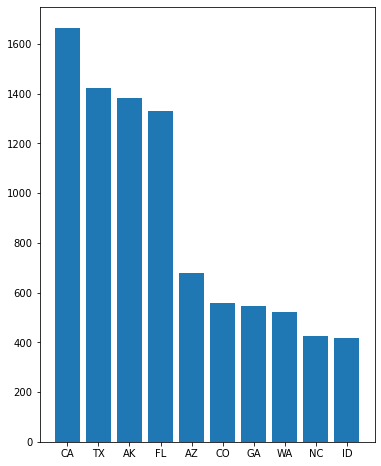

In [101]:
fig, ax = plt.subplots(figsize=(6,8))

top_10_states = list(df['Location_State_Country'].value_counts().head(10).index)
top_10_states_values = list(df['Location_State_Country'].value_counts().head(10).values)

ax.bar(top_10_states, top_10_states_values);

CA, TX, AK, FL seem to have noticeably higher accidents/incidents. It would be worth investigating why that is.

We want to look at which type of activity is associated most with fatalities

In [102]:
df.value_counts("Purpose.of.flight")

Purpose.of.flight
Personal                    11350
Instructional                2680
Unknown                      1235
Aerial Application            877
Other                         530
Business                      454
Other Work Use                407
Aerial Observation            145
Public Use                    119
Executive/corporate            93
Air Race                       47
Other Aerial Application       14
dtype: int64

In [103]:
df.groupby(["Purpose.of.flight", "Injury.Severity"])['Accident.Number'].agg(['count']).head(20)

count
Purpose.of.flight   Injury.Severity       
Aerial Application  Fatal               93
                    Minor                6
                    Non-Fatal          775
                    Serious              3
Aerial Observation  Fatal               35
                    Non-Fatal          109
                    Serious              1
Air Race            Fatal               21
                    Non-Fatal           26
Business            Fatal               89
                    Incident             2
                    Minor                5
                    Non-Fatal          355
                    Serious              3
Executive/corporate Fatal               19
                    Incident             1
                    Non-Fatal           73
Instructional       Fatal              208
                    Incident             3
                    Minor               24

In [104]:
df_fatal = df[df['Injury.Severity'] == 'Fatal']

In [105]:
df_fatal["Purpose.of.flight"].value_counts()

Personal                    1792
Instructional                208
Unknown                      121
Aerial Application            93
Other                         91
Business                      89
Other Work Use                81
Aerial Observation            35
Air Race                      21
Executive/corporate           19
Public Use                    18
Other Aerial Application       6
Name: Purpose.of.flight, dtype: int64

In [106]:
POF_list = list(df['Purpose.of.flight'].value_counts().index)

POF_list

['Personal',
 'Instructional',
 'Unknown',
 'Aerial Application',
 'Other',
 'Business',
 'Other Work Use',
 'Aerial Observation',
 'Public Use',
 'Executive/corporate',
 'Air Race',
 'Other Aerial Application']

In [107]:
#Create a for loop
#for POF in POF_list:
#    POF_Fatal_Percentage[POF] = 


POF_Fatal_Percentage = {'Personal': (1792/11350),
 'Instructional': (208/2680),
 'Unknown': (121/1235),
 'Aerial Application': (93/877),
 'Other':(91/530),
 'Business': (89/454),
 'Other Work Use': (81/407),
 'Aerial Observation': (35/145),
 'Public Use': (18/119),
 'Executive/corporate': (19/93),
 'Air Race': (21/47),
 'Other Aerial Application': (6/14)}

POF_Fatal_Percentage

{'Personal': 0.15788546255506608,
 'Instructional': 0.07761194029850746,
 'Unknown': 0.09797570850202429,
 'Aerial Application': 0.10604332953249715,
 'Other': 0.17169811320754716,
 'Business': 0.1960352422907489,
 'Other Work Use': 0.19901719901719903,
 'Aerial Observation': 0.2413793103448276,
 'Public Use': 0.15126050420168066,
 'Executive/corporate': 0.20430107526881722,
 'Air Race': 0.44680851063829785,
 'Other Aerial Application': 0.42857142857142855}

In [108]:
#sort dictionary
sorted_list = sorted(POF_Fatal_Percentage.items(), key=lambda x: x[1], reverse=True)

sorted_dict = dict(sorted_list)

list(sorted_dict.keys())

#sorted_list_values = [POF_Fatal_Percentage[x] for x in sorted_list]

['Air Race',
 'Other Aerial Application',
 'Aerial Observation',
 'Executive/corporate',
 'Other Work Use',
 'Business',
 'Other',
 'Personal',
 'Public Use',
 'Aerial Application',
 'Unknown',
 'Instructional']

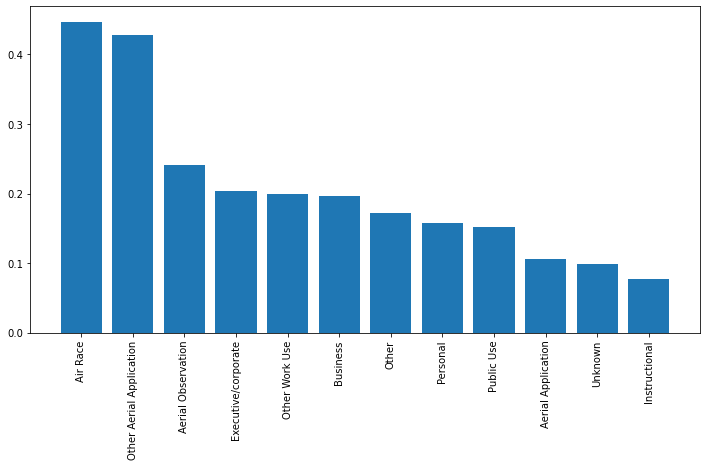

In [109]:
fig, ax = plt.subplots(figsize=(12,6))
ax.tick_params(axis='x', labelrotation=90)

ax.bar(list(sorted_dict.keys()), list(sorted_dict.values()));

In the U.S., we see that Air Race and Other Aerial Applications (includes public health spraying & firefighting) are the purpose of flights with most fatalities when accidents/incidents occur. It seems better to avoid these activities given the riskiness.

We would look to improve our analysis by look at the injury rates by purpose of flight

It would be worth looking into which brands of aircraft fare the best in low visibility weather